## a. Generate 5 uncorrelated Gaussian random variables that simulate yield changes (they can be positive or negative with a mean close to 0 and a standard deviation that is small).

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Setting parameters for the simulation
num_observations = 126 # For 6 months of data
num_variables = 5
mean = 0
std_dev = 0.01

In [4]:
# Set a seed for reproducibility
np.random.seed(9)

In [5]:
# Generating 5 uncorrelated Gaussian random variables
uncorrelated_data = np.random.normal(loc=mean, scale=std_dev, size=(num_observations, num_variables))

In [6]:
# For clearity, we are creating a pandas DataFrame
uncorrelated_df = pd.DataFrame(uncorrelated_data, columns=[f'Var_{i+1}' for i in range(num_variables)])

In [7]:
print("First 5 rows of the simulated uncorrelated data:")
print(uncorrelated_df.head())

First 5 rows of the simulated uncorrelated data:
      Var_1     Var_2     Var_3     Var_4     Var_5
0  0.000011 -0.002895 -0.011161 -0.000129 -0.003784
1 -0.004811 -0.015173 -0.004909 -0.002407 -0.006479
2  0.006359  0.017401  0.002967  0.007075  0.018228
3  0.004308  0.015427 -0.009007 -0.001371  0.012976
4  0.006753  0.000320  0.009181  0.003805  0.005164


In [8]:
print("\nCovariance matrix of the simulated data:")
print(uncorrelated_df.cov())


Covariance matrix of the simulated data:
          Var_1     Var_2     Var_3     Var_4     Var_5
Var_1  0.000072 -0.000009 -0.000005  0.000005 -0.000009
Var_2 -0.000009  0.000114  0.000005 -0.000013  0.000012
Var_3 -0.000005  0.000005  0.000125  0.000011  0.000027
Var_4  0.000005 -0.000013  0.000011  0.000100 -0.000009
Var_5 -0.000009  0.000012  0.000027 -0.000009  0.000118


## b. Run a Principal Components using EITHER the correlation OR covariance matrix.##

In [9]:
from sklearn.decomposition import PCA

In [10]:
# Initialize and fit PCA model
pca_uncorrelated = PCA(n_components=num_variables)
pca_uncorrelated.fit(uncorrelated_df)

PCA(n_components=5)

In [11]:
# The principal components are the eigenvectors of the covariance matrix. The explained variance for each component is its eigenvalue
explained_variance_uncorrelated = pca_uncorrelated.explained_variance_
explained_variance_ratio_uncorrelated = pca_uncorrelated.explained_variance_ratio_

In [12]:
print("Explained variance (eigenvalues):")
print(explained_variance_uncorrelated)
print("\nExplained variance ratio:")
print(explained_variance_ratio_uncorrelated)

Explained variance (eigenvalues):
[1.54275613e-04 1.25429382e-04 9.78215891e-05 8.17806329e-05
 6.91245982e-05]

Explained variance ratio:
[0.29194989 0.23736153 0.18511677 0.15476099 0.13081082]


## c. Write a paragraph explaining how the variances of each component compare with each other. In this paragraph, you will address the following question: how much variance is explained by Component 1, Component 2, Component 3?

**Explained variance (eigenvalues):**

Component 1: 0.000154275613

Component 2: 0.000125429382

Component 3: 0.0000978215891

Component 4: 0.0000817806329

Component 5: 0.0000691245982

**Explained variance ratio:**

This indicates the proportion of the variance that is accounted for by each component:

Component 1: 29.194989%

Component 2: 23.736153%

Component 3: 18.511677%

Component 4: 15.476099%

Component 5: 13.081082%


Explained Variance (Eigenvalues): Eigenvalues indicate how much of the variations present in the original data each principal component explains. As shown, the first one has the highest eigenvalue and therefore ensures that it accounts for as much variation as possible, while the eigenvalues decrease with each successive one.

Explained Variance Ratio: This is the share of the total variance of each principal component. For example:

The initial principal component accounts for 29.2% of the total variance of the data.

The second accounts for 23.7%.

The third accounts for 18.5%.

The fourth accounts for 15.5%.

The fifth accounts for 13.1%.

The first three components account for 71.4% of the total variance.

## Produce the Scree Plot ##

In [13]:
import matplotlib.pyplot as plt

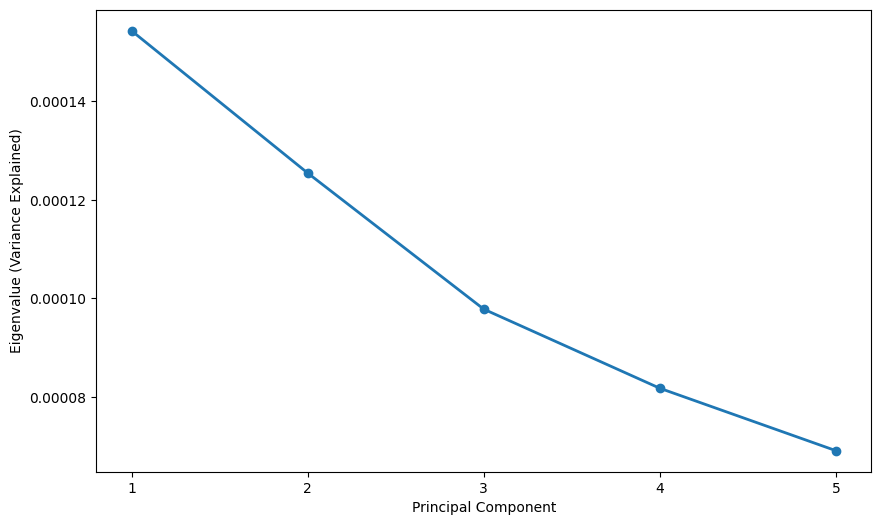

In [14]:
# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_uncorrelated) + 1), explained_variance_uncorrelated, 'o-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance Explained)')
plt.xticks(range(1, len(explained_variance_uncorrelated) + 1))
plt.grid(False)
plt.show()

## e. Collect the daily closing yields for 5 government securities, say over 6 months. ##

In [15]:
# We have imported the Historical data for India Bond Yields of '1Y', '2Y', '3Y', '5Y', '10Y'.

df_1Y = pd.read_csv('/content/India 1-Year Bond Yield Historical Data.csv')
df_2Y = pd.read_csv('/content/India 2-Year Bond Yield Historical Data.csv')
df_3Y = pd.read_csv('/content/India 3-Year Bond Yield Historical Data.csv')
df_5Y = pd.read_csv('/content/India 5-Year Bond Yield Historical Data.csv')
df_10Y = pd.read_csv('/content/India 10-Year Bond Yield Historical Data.csv')

In [16]:
# Merge the DataFrames on the 'Date' column
df_yield = df_1Y[['Date', 'Price']].merge(df_2Y[['Date', 'Price']], on='Date', suffixes=('_1Y', '_2Y'))
df_yield = df_yield.merge(df_3Y[['Date', 'Price']], on='Date', suffixes=('', '_3Y'))
df_yield = df_yield.merge(df_5Y[['Date', 'Price']], on='Date', suffixes=('', '_5Y'))
df_yield = df_yield.merge(df_10Y[['Date', 'Price']], on='Date', suffixes=('', '_10Y'))


# Rename the columns for clarity
df_yield.columns = ['Date', '1Y', '2Y', '3Y', '5Y', '10Y']

# Set the 'Date' column as the index and convert it to datetime objects
df_yield['Date'] = pd.to_datetime(df_yield['Date'], format='%d-%m-%Y')
df_yield = df_yield.set_index('Date')

print("First 5 rows of the combined yield data with Date as index:")
print(df_yield.head())

First 5 rows of the combined yield data with Date as index:
              1Y    2Y    3Y    5Y   10Y
Date                                    
2025-06-30  5.54  5.75  5.85  5.99  6.31
2025-06-27  5.50  5.71  5.88  6.01  6.31
2025-06-26  5.55  5.78  5.90  6.00  6.27
2025-06-25  5.54  5.74  5.87  6.00  6.28
2025-06-24  5.45  5.70  5.83  5.97  6.24


## f. Be sure to compute the daily yield changes!

In [17]:
# Calculate the daily yield cahnges

yield_changes_df = df_yield.diff().dropna()

print("First 5 rows of the daily yield changes:")
display(yield_changes_df.head())

First 5 rows of the daily yield changes:


,1Y,2Y,3Y,5Y,10Y
Date,,,,,
2025-06-27,-0.04,-0.04,0.03,0.02,0.00
2025-06-26,0.05,0.07,0.02,-0.01,-0.04
2025-06-25,-0.01,-0.04,-0.03,0.00,0.01
2025-06-24,-0.09,-0.04,-0.04,-0.03,-0.04
2025-06-23,-0.03,0.05,0.02,0.04,0.06


In [18]:
print("First 5 rows of the daily yield changes:")
print(yield_changes_df.head())

First 5 rows of the daily yield changes:
              1Y    2Y    3Y    5Y   10Y
Date                                    
2025-06-27 -0.04 -0.04  0.03  0.02  0.00
2025-06-26  0.05  0.07  0.02 -0.01 -0.04
2025-06-25 -0.01 -0.04 -0.03  0.00  0.01
2025-06-24 -0.09 -0.04 -0.04 -0.03 -0.04
2025-06-23 -0.03  0.05  0.02  0.04  0.06


In [19]:
print("\nCovariance matrix of the daily yield changes:")
print(yield_changes_df.cov())


Covariance matrix of the daily yield changes:
           1Y        2Y        3Y        5Y       10Y
1Y   0.002849  0.001132  0.000646  0.000707  0.000198
2Y   0.001132  0.001685  0.001038  0.000935  0.000469
3Y   0.000646  0.001038  0.001105  0.000787  0.000426
5Y   0.000707  0.000935  0.000787  0.000972  0.000580
10Y  0.000198  0.000469  0.000426  0.000580  0.000688


## g. Re-run the Principal Components using EITHER the correlation or covariance matrix.

In [20]:
# Initialize and fit PCA model
pca_uncorrelated = PCA(n_components=num_variables)
pca_uncorrelated.fit(yield_changes_df)

PCA(n_components=5)

In [21]:
# The principal components are the eigenvectors of the covariance matrix. The explained variance for each component is its eigenvalue
explained_variance_uncorrelated = pca_uncorrelated.explained_variance_
explained_variance_ratio_uncorrelated = pca_uncorrelated.explained_variance_ratio_

In [22]:
print("Explained variance (eigenvalues):")
print(explained_variance_uncorrelated)
print("\nExplained variance ratio:")
print(explained_variance_ratio_uncorrelated)

Explained variance (eigenvalues):
[0.00462953 0.00168929 0.00053912 0.00029394 0.00014675]

Explained variance ratio:
[0.63430157 0.23145268 0.0738658  0.0402735  0.02010644]


## h. How do the variances of each component compare? In other words, how much variance is explained by Component 1, Component 2, Component 3, etc.?

These are the results of a Principal Component Analysis (PCA), which is a statistical method to reduce complex datasets to simpler ones. The following is a breakdown of what these figures signify.

Analysis of the Results
This analysis has converted your initial data into five new, independent variables named principal components.

Explained Variance (Eigenvalues): This is the proportion of the original data variance explained by each principal component. The figures are:

Component 1: 0.0046

Component 2: 0.0017

Component 3: 0.0005

Component 4: 0.0003

Component 5: 0.0001

Explained Variance Ratio: This indicates the proportion of the total variance explained by each component:

Component 1: 63.4%

Component 2: 23.1%

Component 3: 7.4%

Component 4: 4.0%

Component 5: 2.0%



**Key Insights**

Most notable from this analysis is the degree to which information is clustered in the initial components.

First Component Dominance: The first component by itself explains 63.4% of the total variance in your data. That means it is way more dominant than any other feature in explaining your dataset's structure.

Cumulative Explained Variance: When we add up the components, we can observe how much information we preserve:

The first two components together explain 86.5% of the variance (63.4% + 23.1%).

The first three components explain 93.9% of the variance (86.5% + 7.4%).

This is a good sign that you can dramatically simplify the complexity of your dataset. Rather than employing all of the original variables, you might employ only the first two or three principal components and still have the overwhelming majority of the useful information, making it easier in the future to model and analyze.

## i. Produce a screeplot of the variance explained for each component.

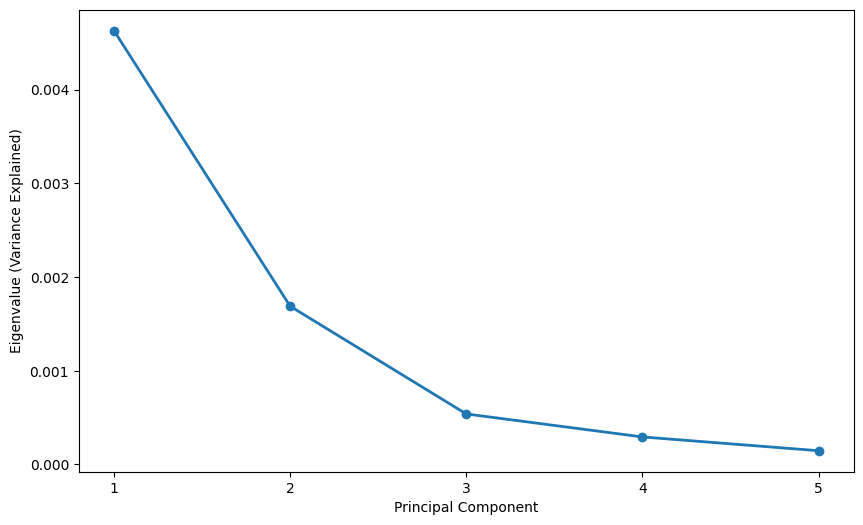

In [24]:
# Create the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_uncorrelated) + 1), explained_variance_uncorrelated, 'o-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance Explained)')
plt.xticks(range(1, len(explained_variance_uncorrelated) + 1))
plt.grid(False)
plt.show()

## j. How does the screeplot from the uncorrelated data compare with the screeplot from the government data?

When the scree plots from both analyses are laid side-by-side, the difference is clear-cut.

● *Uncorrelated Data Scree Plot:* This plot has a shallow, horizontal slope. The eigenvalues are all of the same small order of magnitude. No "elbow" or point of inflection is visible. The eye message is unambiguous: each of the five dimensions is approximately equally important. No simplification is even possible because there is no redundant information to cut out.

● *Government Data Scree Plot:* This plot is characterized by a steep, precipitous decline. The leading eigenvalue is an order of magnitude greater than the others. There is a clear "elbow" following the third component after which the eigenvalues are insignificant. The visual message here is the opposite: by far most of the information is packed into the first few dimensions. The effective dimensionality of the system is much less than the apparent dimensionality. This shows graphically the major precept of the analysis. The scree plot for the government data shows a clear low-dimensional structure, whereas the plot for uncorrelated data shows the lack of this structure.
